In [1]:
import gpflow as gpf
import numpy as np
import matplotlib.pyplot as plt

from model_trainers.shared_independent_trainer import SharedIndependentTrainer

In [2]:
def f_1_hf(x):
    return np.sin(2 * np.pi * x)

def f_1_lf(x):
    return (x / 4 - np.sqrt(2)) * np.sin(2 * np.pi * x + a * np.pi) ** a

def f_2_hf(x):
    return np.cos(2 * np.pi * x)

def f_2_lf(x):
    return (x / 4 - np.sqrt(2)) * np.cos(2 * np.pi * x + a * np.pi) ** a

In [3]:
def generate_data(Ns, fs_2d):
    Xs = []
    Ys = []
    for N, fs in zip(Ns, fs_2d):
        X = np.random.rand(N)[:, None]
        Xs.append(X)
        Ys.append(np.hstack([f(X) for f in fs]))
    return Xs, Ys

In [4]:
def plot_model(trainer, data, fidelity, lower=-0, upper=1):
    pX = np.linspace(lower, upper, 100)[:, None]
    pY, pYv = trainer.predict(pX, fidelity=fidelity)
    plt.plot(data[0], data[1], "x")
    plt.gca().set_prop_cycle(None)
    plt.plot(pX[:, 0], pY)
    for i in range(pY.shape[1]):
        top = pY[:, i] + 2.0 * pYv[:, i] ** 0.5
        bot = pY[:, i] - 2.0 * pYv[:, i] ** 0.5
        plt.fill_between(pX[:, 0], top, bot, alpha=0.3)
    plt.xlabel("X")
    plt.ylabel("f")
    plt.title(f"ELBO: {trainer.get_elbo(training=True):.3}")

# Single Fidelity Model

In [5]:
Ns = [10]  # List of number of data points to use per fidelity
fs_2d = [[f_1_hf, f_2_hf]]  # List of outputs per fidelity. Should be a 2D list
D = 1  # number of input dimensions
M = 5  # number of inducing points
O = 2  # number of outputs
max_fidelity = 1  # maximum fidelity
a = 1  # parameter for function evals

In [6]:
Xs, Ys = generate_data(Ns, fs_2d)

trainer = SharedIndependentTrainer(
    Xs=Xs,
    Ys=Ys,
    inducing_size=M,
    optimizer=gpf.optimizers.Scipy()
)
trainer.construct_model()

In [7]:
trainer.train()

Start training...


0it [00:00, ?it/s]

Done training! Final ELBO (higher is better): 25.7


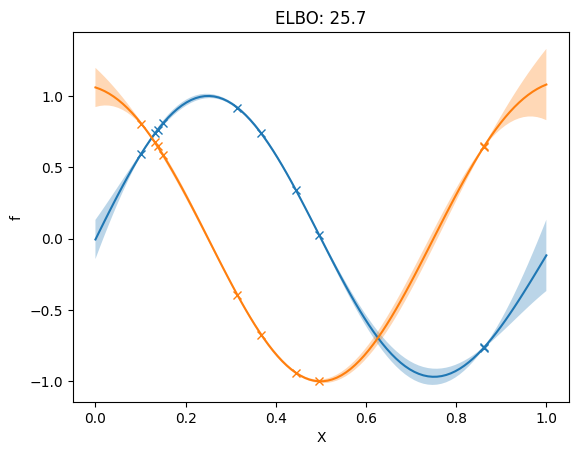

In [8]:
plot_model(trainer, (Xs[-1], Ys[-1]), max_fidelity, lower=0, upper=1)

# 2 Fidelity Model

In [13]:
Ns = [100, 10]  # List of number of data points to use per fidelity
fs_2d = [[f_1_lf, f_2_lf], [f_1_hf, f_2_hf]]  # List of outputs per fidelity. Should be a 2D list
D = 1  # number of input dimensions
M = 5  # number of inducing points
O = 2  # number of outputs
max_fidelity = 2  # maximum fidelity
a = 1  # parameter for function evals

In [14]:
Xs, Ys = generate_data(Ns, fs_2d)

trainer = SharedIndependentTrainer(
    Xs=Xs,
    Ys=Ys,
    inducing_size=M,
    optimizer=gpf.optimizers.Scipy()
)
trainer.construct_model()

In [15]:
trainer.train()

Start training...


100%|██████████| 1/1 [00:06<00:00,  6.78s/it]

Done training! Final ELBO (higher is better): 7.29


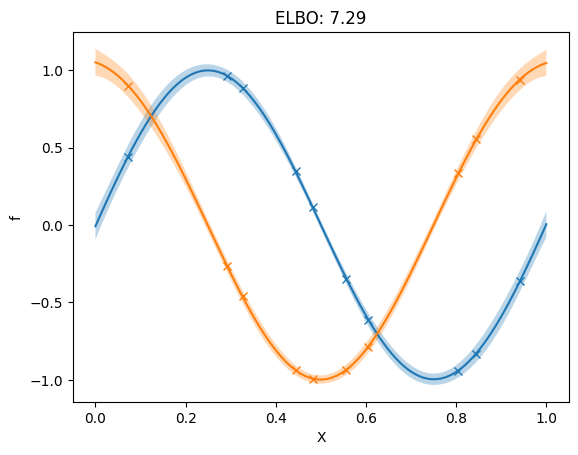

In [16]:
plot_model(trainer, (Xs[-1], Ys[-1]), max_fidelity, lower=0, upper=1)